### A notebook for data analysis of the sensitivity analysis

In [1]:
import pandas as pd
import scipy.stats as st

In [2]:
# Specify the experiment wanted
value_to_vary_name = "earthquake-magnitude"
v = 0.32
replications = 25

# Read the pickle
series_df = pd.read_pickle(f'../results/sensitivity/sens_series_{value_to_vary_name}_{v}_{replications}r_df.pickle')
series_df.head()

,recovered-hospital,recovered-with-help,recovered-unchecked,fraction-called-in,deaths,number-destroyed-streets-spotted,fraction-destroyed-streets-spotted,recovered-hospital,recovered-with-help,recovered-unchecked,...,deaths,number-destroyed-streets-spotted,fraction-destroyed-streets-spotted,recovered-hospital,recovered-with-help,recovered-unchecked,fraction-called-in,deaths,number-destroyed-streets-spotted,fraction-destroyed-streets-spotted
,0,0,0,0,0,0,0,1,1,1,...,23,23,23,24,24,24,24,24,24,24
0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,...,59.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,0.0,0.0
1.0,0.0,6.0,136.0,0.034633,77.0,84.0,0.034077,0.0,6.0,120.0,...,64.0,66.0,0.028133,0.0,5.0,106.0,0.034956,84.0,78.0,0.032691
2.0,0.0,17.0,284.0,0.044219,83.0,150.0,0.060852,0.0,11.0,283.0,...,73.0,103.0,0.043905,0.0,9.0,230.0,0.041686,88.0,108.0,0.045264
3.0,0.0,25.0,416.0,0.053767,87.0,205.0,0.083164,0.0,17.0,424.0,...,80.0,142.0,0.060529,0.0,12.0,361.0,0.052177,95.0,147.0,0.061609
4.0,0.0,31.0,563.0,0.063817,92.0,245.0,0.099391,0.0,26.0,561.0,...,84.0,193.0,0.082268,0.0,16.0,506.0,0.061797,97.0,188.0,0.078793


<AxesSubplot: >

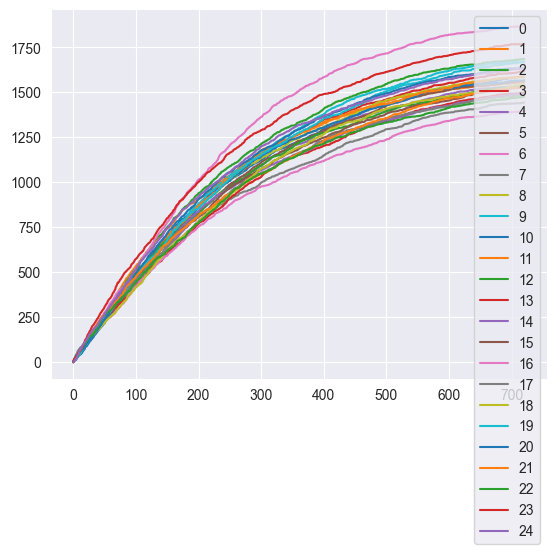

In [3]:
# Plot for one run all the variables
series_df["recovered-with-help"].plot()

<AxesSubplot: >

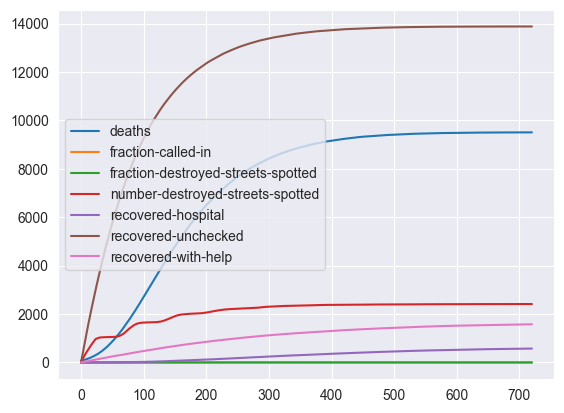

In [4]:
# Take the average of all the runs and plot those
series_df_agg = series_df.groupby(level=[0], axis="columns").mean()
series_df_agg.plot()

## Full sensitivity analysis

### Load data

In [5]:
# Load a dictionary with the default values and if they are rounded or not
default_values = {
    # variable-name: (number, rounded to int or not)
    "call-limit": (True, False),
    "earthquake-magnitude": (0.4, False),
    "amount-ambulances": (40, True),
    "probability-call-112": (1, False),
    "amount-hospitals": (10, True),
    "hospital-capacity": (100, True),
    "hospital-filling-percentage-t0": (60, False),
    "initial-ambulance-search-radius": (5, True),
    "percentage-concrete-buildings": (70, False),
    "high-damage-road-blocked-chance": (10, False),
    "collapsed-road-blocked-chance": (25, False),
    "max-concurrent-calls": (50, True),
    "average-call-time": (2.5, False),
    "amount-drones": (10, True),
    "drone-speed": (0.5, False),
    "drone-range": (45, False),
    "ambulance-reroute-frequency": (5, True),
}

In [6]:
# Create a dictionary with all the input values used
input_values = {}
amount_to_vary = [0.8, 1.25]

for var, val in default_values.items():
    input_values[var] = [round(val[0] * v, 5) for v in amount_to_vary]
    if val[1]:
        input_values[var] = [int(v) for v in input_values[var]]
input_values["call-limit"] = [True, False]
input_values

{'call-limit': [True, False],
 'earthquake-magnitude': [0.32, 0.5],
 'amount-ambulances': [32, 50],
 'probability-call-112': [0.8, 1.25],
 'amount-hospitals': [8, 12],
 'hospital-capacity': [80, 125],
 'hospital-filling-percentage-t0': [48.0, 75.0],
 'initial-ambulance-search-radius': [4, 6],
 'percentage-concrete-buildings': [56.0, 87.5],
 'high-damage-road-blocked-chance': [8.0, 12.5],
 'collapsed-road-blocked-chance': [20.0, 31.25],
 'max-concurrent-calls': [40, 62],
 'average-call-time': [2.0, 3.125],
 'amount-drones': [8, 12],
 'drone-speed': [0.4, 0.625],
 'drone-range': [36.0, 56.25],
 'ambulance-reroute-frequency': [4, 6]}

In [7]:
reference = f'../results/sensitivity/sens_series_call-limit_True_{replications}r_df.pickle'

In [8]:
# Read all the pickles into a dictionary of dataframes
dfs = {}
for k, vs in input_values.items():
    for i, v in enumerate(vs):
        dfs[(k, v)] = pd.read_pickle(f'../results/sensitivity/sens_series_{k}_{v}_{replications}r_df.pickle')
        if i == 0:  # Add the reference df after each first value
            dfs[(k, default_values[k][0])] = pd.read_pickle(reference)

### Calculate means

In [9]:
# Create a dictionary with the means
mean_dict = {}
for (k, v), df_t in dfs.items():
    mean_dict[(k, v)] = df_t.iloc[720].groupby(level=0).mean().to_dict()

In [10]:
mean_df = pd.DataFrame.from_dict(mean_dict).T
mean_df

deaths  fraction-called-in  \
call-limit                      True    9894.00                 1.0   
                                False   9768.24                 1.0   
earthquake-magnitude            0.32    9505.36                 1.0   
                                0.4     9894.00                 1.0   
                                0.5    10427.56                 1.0   
amount-ambulances               32     10076.16                 1.0   
                                40      9894.00                 1.0   
                                50      9893.52                 1.0   
probability-call-112            0.8     9861.64                 1.0   
                                True    9894.00                 1.0   
                                1.25    9872.96                 1.0   
amount-hospitals                8       9866.80                 1.0   
                                10      9894.00                 1.0   
                                12      9899.88                 1.0   
hospital-capacity               80      9934.20                 1.0   
                                100     9894.00                 1.0   
                                125     9955.96                 1.0   
hospital-filling-percentage-t0  48.0    9917.08                 1.0   
                                60      9894.00                 1.0   
                                75.0    9949.00                 1.0   
initial-ambulance-search-radius 4       9886.60                 1.0   
                                5       9894.00                 1.0   
                                6       9877.80                 1.0   
percentage-concrete-buildings   56.0   10130.24                 1.0   
                                70      9894.00                 1.0   
                                87.5    9601.88                 1.0   
high-damage-road-blocked-chance 8       9869.72                 1.0   
                                10      9894.00                 1.0   
                                12.5    9927.20                 1.0   
collapsed-road-blocked-chance   20.0    9916.52                 1.0   
                                25      9894.00                 1.0   
                                31.25   9908.16                 1.0   
max-concurrent-calls            40      9969.76                 1.0   
                                50      9894.00                 1.0   
                                62      9871.32                 1.0   
average-call-time               2.0     9938.20                 1.0   
                                2.5     9894.00                 1.0   
                                3.125   9851.64                 1.0   
amount-drones                   8       9936.12                 1.0   
                                10      9894.00                 1.0   
                                12      9976.28                 1.0   
drone-speed                     0.4     9942.28                 1.0   
                                0.5     9894.00                 1.0   
                                0.625   9919.64                 1.0   
drone-range                     36.0    9959.92                 1.0   
                                45      9894.00                 1.0   
                                56.25   9998.24                 1.0   
ambulance-reroute-frequency     4       9941.92                 1.0   
                                5       9894.00                 1.0   
                                6       9967.20                 1.0   

                                       fraction-destroyed-streets-spotted  \
call-limit                      True                             0.994551   
                                False                            0.993046   
earthquake-magnitude            0.32                             0.998247   
                                0.4                              0.994551   
                                0.

In [11]:
mean_df.to_excel("test.xlsx")

### Normalize sensitivity

In [12]:
mean_df_s = mean_df.drop(columns=mean_df.columns[1:4]).T
mean_df_s = mean_df_s.drop(columns="call-limit", level=0)
mean_df_s

earthquake-magnitude                      \
                                    0.32       0.4       0.5   
deaths                           9505.36   9894.00  10427.56   
recovered-hospital                574.76    564.04    575.24   
recovered-unchecked             13878.68  14244.60  14680.56   
recovered-with-help              1577.68   1564.44   1579.52   

                    amount-ambulances                      \
                                   32        40        50   
deaths                       10076.16   9894.00   9893.52   
recovered-hospital             500.32    564.04    627.60   
recovered-unchecked          14342.04  14244.60  14204.24   
recovered-with-help           1454.12   1564.44   1645.84   

                    probability-call-112                     amount-hospitals  \
                                     0.8      True      1.25                8   
deaths                           9861.64   9894.00   9872.96          9866.80   
recovered-hospital                583.36    564.04    573.48           529.20   
recovered-unchecked             14211.56  14244.60  14192.64         14199.92   
recovered-with-help              1569.12   1564.44   1570.44          1375.60   

                     ... amount-drones drone-speed                      \
                     ...            12         0.4       0.5     0.625   
deaths               ...       9976.28     9942.28   9894.00   9919.64   
recovered-hospital   ...        572.88      545.68    564.04    595.84   
recovered-unchecked  ...      14367.32    14296.20  14244.60  14249.64   
recovered-with-help  ...       1563.80     1519.16   1564.44   1616.40   

                    drone-range                      \
                           36.0        45     56.25   
deaths                  9959.92   9894.00   9998.24   
recovered-hospital       580.80    564.04    553.20   
recovered-unchecked    14246.00  14244.60  14346.04   
recovered-with-help     1583.72   1564.44   1540.20   

                    ambulance-reroute-frequency                      
                                              4         5         6  
deaths                                  9941.92   9894.00   9967.20  
recovered-hospital                       548.32    564.04    575.80  
recovered-unchecked                    14224.84  14244.60  14311.28  
recovered-with-help                     1524.72   1564.44   1566.40  

[4 rows x 48 columns]

In [13]:
dev_df = pd.DataFrame(index=mean_df_s.index)
for key in list(input_values.keys())[1::]:
    ref = mean_df_s[key].columns[1]
    for i, column in enumerate(mean_df_s[key].columns):
        if i != 1:
            ratio = column/ref
            dev_df[key, ratio] = (mean_df_s[key][column] - mean_df_s[key][ref]) / mean_df_s[key][ref]
dev_df.columns = pd.MultiIndex.from_tuples(dev_df.columns)
dev_df.T

deaths  recovered-hospital  \
earthquake-magnitude            0.80 -0.039280            0.019006   
                                1.25  0.053928            0.019857   
amount-ambulances               0.80  0.018411           -0.112971   
                                1.25 -0.000049            0.112687   
probability-call-112            0.80 -0.003271            0.034253   
                                1.25 -0.002127            0.016736   
amount-hospitals                0.80 -0.002749           -0.061769   
                                1.20  0.000594            0.046876   
hospital-capacity               0.80  0.004063            0.015744   
                                1.25  0.006262            0.005673   
hospital-filling-percentage-t0  0.80  0.002333            0.042408   
                                1.25  0.005559            0.060918   
initial-ambulance-search-radius 0.80 -0.000748            0.076094   
                                1.20 -0.001637            0.009290   
percentage-concrete-buildings   0.80  0.023877           -0.035175   
                                1.25 -0.029525            0.031203   
high-damage-road-blocked-chance 0.80 -0.002454            0.039288   
                                1.25  0.003356           -0.010638   
collapsed-road-blocked-chance   0.80  0.002276            0.039217   
                                1.25  0.001431           -0.027516   
max-concurrent-calls            0.80  0.007657           -0.044749   
                                1.24 -0.002292            0.033260   
average-call-time               0.80  0.004467            0.051415   
                                1.25 -0.004281           -0.073541   
amount-drones                   0.80  0.004257           -0.018155   
                                1.20  0.008316            0.015673   
drone-speed                     0.80  0.004880           -0.032551   
                                1.25  0.002591            0.056379   
drone-range                     0.80  0.006663            0.029714   
                                1.25  0.010536           -0.019218   
ambulance-reroute-frequency     0.80  0.004843           -0.027870   
                                1.20  0.007398            0.020850   

                                      recovered-unchecked  recovered-with-help  
earthquake-magnitude            0.80            -0.025688             0.008463  
                                1.25             0.030605             0.009639  
amount-ambulances               0.80             0.006840            -0.070517  
                                1.25            -0.002833             0.052031  
probability-call-112            0.80            -0.002319             0.002991  
                                1.25            -0.003648             0.003835  
amount-hospitals                0.80            -0.003137            -0.120708  
                                1.20             0.000205             0.087137  
hospital-capacity               0.80             0.003423            -0.065276  
                                1.25             0.007557             0.081409  
hospital-filling-percentage-t0  0.80            -0.001396            -0.062284  
                                1.25            -0.000258             0.112500  
initial-ambulance-search-radius 0.80            -0.000463             0.034466  
                                1.20            -0.002449            -0.001023  
percentage-concrete-buildings   0.80             0.013995            -0.032932  
                                1.25            -0.021504             0.009946  
high-damage-road-blocked-chance 0.80            -0.000334             0.022219  
                                1.25            -0.004218            -0.012835  
collapsed-road-blocked-chance   0.80             0.000432             0.029352  
                                1.25            -0.004546            -0.025645  
max-concurrent-calls        

### Extreme values